<a href="https://colab.research.google.com/github/bat-amgalan09/Machine-learning-project/blob/main/MSML_603_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

# Project Objectives
1 Binary Classifiers: Part 1 - Original Features
In the first part of the project, you will use the samples in ‘TrainingData.csv’ to train the following
four (4) classifiers. You will evaluate the performance of each classifier by considering two different types
of errors for the testing data: a type 1 error happens when your classifier chooses ‘Denied’ for an application
that was ’Approved’ in the testing data. A type 2 error occurs when your classifier selects ‘Approved’ for a
‘Denied’ application in the testing data. For each classifier you design, using the testing data, compute the
type 1 error rate (which is the number of type 1 errors divided by 200) and the type 2 error rate (which is the
number of type 2 errors divided by 200).
Some basic instructions are provided below. However, you are allowed to choose the algorithms used for
these classifiers. For example, for a decision tree, you can use any of the following algorithms – ID3, C4.5,
CART (classification and regression tree). Please make sure to set them up correctly when using built-in
algorithms/functions and explain which algorithms are used in your code (this can be embedded in your
codes as comments).
1. Linear discriminant analysis - For this binary classifier, you first need to find a suitable direction
w ∈ IR27 so that the projections of the samples can be used for classification. In other words, if xk
is the k-th sample in the testing data and yk is the coefficient for its projection obtained using the
vector w you find from the training data, your new features are yk = wT xk, k = 1, . . . , 400, and the
classification of the k-th sample is performed using yk (instead of xk) by selecting a suitable threshold
on the new features. Plot both type 1 error rate and type 2 error rate as you vary the threshold.
2. Decision tree - For designing a decision tree, you can either use a built-in function or (if you want
to challenge yourself) identify the attribute or question at each decision node using Gini impurity or
1
information gain (e.g., Is Annual Income > $40k?). If you take the latter approach, make
sure to provide the set of questions you use for your decision tree at the decision nodes.
3. k-nearest neighbors - Evaluate the performance of kNN algorithm for k = 1, 3, 5, 10.
4. Support vector machine - The provided training data is not (linearly) separable, i.e., there is no sepa-
rating hyperplane (short of using other techniques). Thus, you will need to use soft margin. If you use
a built-in function, provide the formulation/optimization problem used for the classifier (which can
be found in the accompanying documentation). If you design your own SVM, provide the objective
function used for selecting the hyperplane.
### 2 Binary classifiers: Part 2 - Use the PCA to Design New Features
In the first part of the project, you were asked to use the original 27 features in the training data for training
the classifiers (and the same features for testing). In the second part of the project, you are asked to design
both the kNN classifier and the SVM based on the new features you obtain after applying the PCA. Let K
be the number of principal components you use to approximate the training samples (hence the number of
new features). For K ∈ {5, 10, 15}, design both kNN and SVM classifiers using K new features (which are
the coefficients in the approximations). Compare the performance of the new kNN and SVM classifiers to
that of the classifiers in the first part.

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
drive.mount('/content/drive')
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train = pd.read_csv("/content/drive/My Drive/msml603/TrainingData.csv")
df_test = pd.read_csv("/content/drive/My Drive/msml603/TestingData.csv")

In [5]:
#### Checking the data for nan values
df_train.head()
df_train.info()
df_train.describe()
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          900 non-null    int64  
 1   Annual Income                900 non-null    int64  
 2   Credit Score                 900 non-null    int64  
 3   Experience                   900 non-null    int64  
 4   Loan Amount                  900 non-null    int64  
 5   Loan Duration                900 non-null    int64  
 6   Number of Dependents         900 non-null    int64  
 7   Monthly Debt Payment         900 non-null    int64  
 8   Creditcard Utilizatio Rate   900 non-null    float64
 9   Number of Open Credit Lines  900 non-null    int64  
 10  Number of Credit Inquries    900 non-null    int64  
 11  Debt to Income Ratio         900 non-null    float64
 12  Bankruptcy History           900 non-null    int64  
 13  Previous Loan Defaul

,0
Age,0
Annual Income,0
Credit Score,0
Experience,0
Loan Amount,0
Loan Duration,0
Number of Dependents,0
Monthly Debt Payment,0
Creditcard Utilizatio Rate,0
Number of Open Credit Lines,0


# Part 1:
# Binary Classifiers:

## 1.Linear Discriminant Analysis

In [6]:
#### Splitting the data into train test and X, Y. Y is whether loan is approved or not
X_train = df_train.drop('LoanApproved', axis=1)
y_train = df_train['LoanApproved']
X_test = df_test.drop('LoanApproved', axis=1)
y_test = df_test['LoanApproved']
#### I will change the values of approved loan 1 to 'Approved' and 0 to 'Denied'
y_train = y_train.map({1: 'Approved', 0: 'Denied'})
y_test = y_test.map({1: 'Approved', 0: 'Denied'})

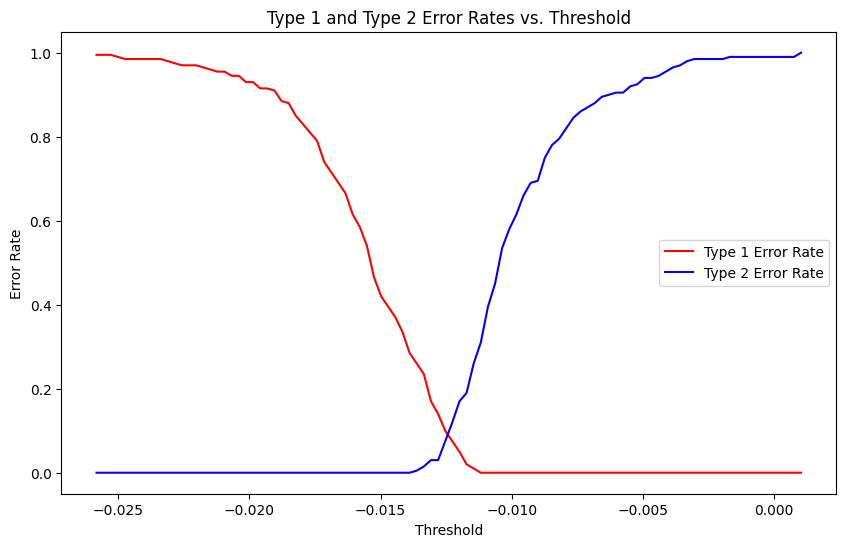

In [7]:
#### Calculating the mean vectors for each class of training set
class_approved = X_train[y_train == 'Approved']
class_denied = X_train[y_train == 'Denied']

mean_approved = np.mean(class_approved, axis=0)
mean_denied = np.mean(class_denied, axis=0)

#### Computing the within-class scatter matrix
S_w = np.cov(class_approved.T) * (len(class_approved) - 1) + np.cov(class_denied.T) * (len(class_denied) - 1)

#### Finding the "W"
S_w_inv = np.linalg.inv(S_w)
w = S_w_inv @ (mean_approved - mean_denied)

#### Projecting the test data onto "W"
y_projections = np.dot(X_test, w)

#### Type 1 and Type 2 Errors by varying threshold `T`
thresholds = np.linspace(min(y_projections), max(y_projections), 100)
type_1_error = []
type_2_error = []

for T in thresholds:
    y_pred = np.where(y_projections > T, 'Approved', 'Denied')

    # Confusion matrix for the predictions
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=['Denied', 'Approved']).ravel()

    # Type 1 errors: Approved but taken as Denied
    type_1_error_rate = fp / 200

    # Type 2 errors: Denied but taken as Approved
    type_2_error_rate = fn / 200
    type_1_error.append(type_1_error_rate)
    type_2_error.append(type_2_error_rate)

#### Plot of Type 1 and Type 2 Error Rates as Threshold varies
plt.figure(figsize=(10, 6))
plt.plot(thresholds, type_1_error, label='Type 1 Error Rate', color='red')
plt.plot(thresholds, type_2_error, label='Type 2 Error Rate', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Type 1 and Type 2 Error Rates vs. Threshold')
plt.legend()
plt.show()


In [8]:
# Chooseing a threshold T for classification
threshold = 0

# Classifying based on the threshold
y_pred = np.where(y_projections > threshold, 'Approved', 'Denied')

# Calculating different types of scores for model testing
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Approved')
recall = recall_score(y_test, y_pred, pos_label='Approved')
f1 = f1_score(y_test, y_pred, pos_label='Approved')

y_test_binary = np.where(y_test == 'Approved', 1, 0)
roc_auc = roc_auc_score(y_test_binary, y_projections)

# Displaying the scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.5050
Precision: 1.0000
Recall: 0.0100
F1 Score: 0.0198
ROC AUC Score: 0.9790


## 2.Decision Tree Classifier

In [9]:
#### Using scikit library decsision tree classifier for gini model
tree_model = DecisionTreeClassifier(criterion='gini')

tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

#### Creating a confusion matrix to find type 1 and 2 errors
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["Denied", "Approved"]).ravel()

# Step 4: Compute Type 1 and Type 2 Error Rates
type_1_error_rate = fn / 200  # Type 1 Error (False Negatives) divided by test size
type_2_error_rate = fp / 200  # Type 2 Error (False Positives) divided by test size

# Display the error rates
print("\nDecision Tree Classifier Performance using gini:\n")
print(f"  Type 1 Error Rate: {type_1_error_rate:.4f}")
print(f"  Type 2 Error Rate: {type_2_error_rate:.4f}")

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

    Approved       0.85      0.81      0.83       200
      Denied       0.82      0.86      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


Decision Tree Classifier Performance using gini:

  Type 1 Error Rate: 0.1850
  Type 2 Error Rate: 0.1400


### Using Entropy to calculate the accuracy and test error


In [10]:
#### Decision Tree Model using entropy
tree_model = DecisionTreeClassifier(criterion='entropy')

#### In this model I will use Decision tree classifier library from scikit learn to create a tree model
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

#### Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["Denied", "Approved"]).ravel()

# Type 1 and Type 2 Error Rates
type_1_error_rate = fn / 200  # Type 1 Error
type_2_error_rate = fp / 200  # Type 2 Error

# Display the error rates
print("\nDecision Tree Classifier Performance using Entropy:\n")
print(f"  Type 1 Error Rate: {type_1_error_rate:.4f}")
print(f"  Type 2 Error Rate: {type_2_error_rate:.4f}")

Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

    Approved       0.84      0.85      0.85       200
      Denied       0.85      0.83      0.84       200

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400


Decision Tree Classifier Performance using Entropy:

  Type 1 Error Rate: 0.1450
  Type 2 Error Rate: 0.1650


### Plotting the first few nodes of the decision tree to see how the model is divided. The root node turns out to be Total Debt to Income ratio being <= 0.225, followed by Interest rate and networt, etc.

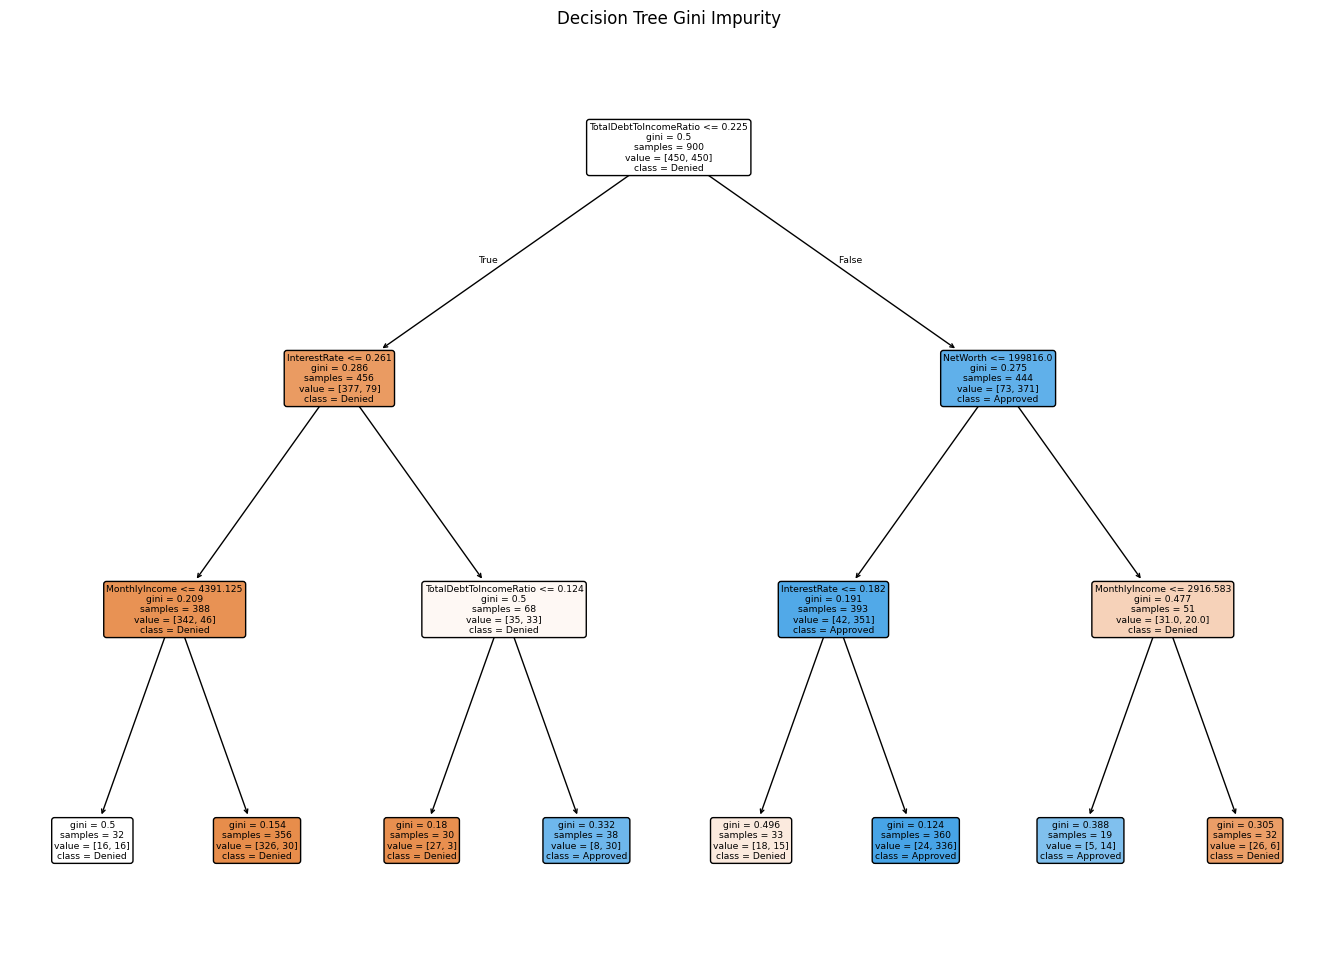

In [11]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3)  # You can adjust max_depth
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(17, 12))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Denied', 'Approved'], rounded=True)
plt.title("Decision Tree Gini Impurity")
plt.show()

### Using entropy to build tree model results in the similar model with D/I ratio followed by interest rate.

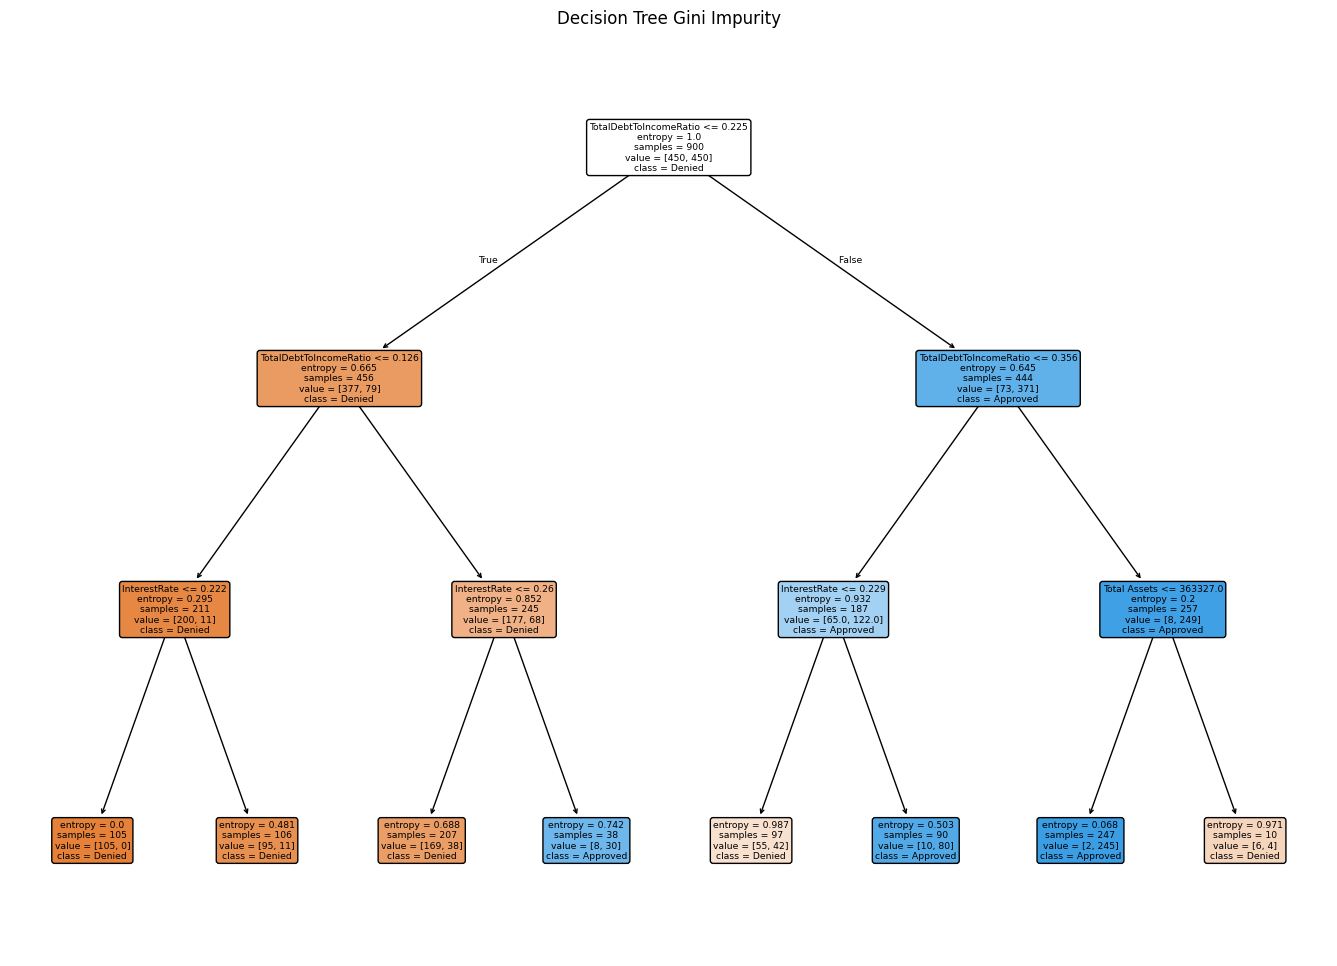

In [12]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_model.fit(X_train, y_train)

#The Decision tree with Entropy
plt.figure(figsize=(17, 12))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Denied', 'Approved'], rounded=True)
plt.title("Decision Tree Gini Impurity")
plt.show()

## 3.K Nearest Neighbors

k-Nearest Neighbors (k=1) Classifier Performance:
  Type 1 Error Rate: 0.1850
  Type 2 Error Rate: 0.2500

k-Nearest Neighbors (k=3) Classifier Performance:
  Type 1 Error Rate: 0.1700
  Type 2 Error Rate: 0.1850

k-Nearest Neighbors (k=5) Classifier Performance:
  Type 1 Error Rate: 0.1350
  Type 2 Error Rate: 0.2000

k-Nearest Neighbors (k=10) Classifier Performance:
  Type 1 Error Rate: 0.0950
  Type 2 Error Rate: 0.2200

    Accuracy  Precision  F1 Score
1     0.7825   0.765258  0.789346
3     0.8225   0.817734  0.823821
5     0.8325   0.812207  0.837772
10    0.8425   0.804444  0.851765


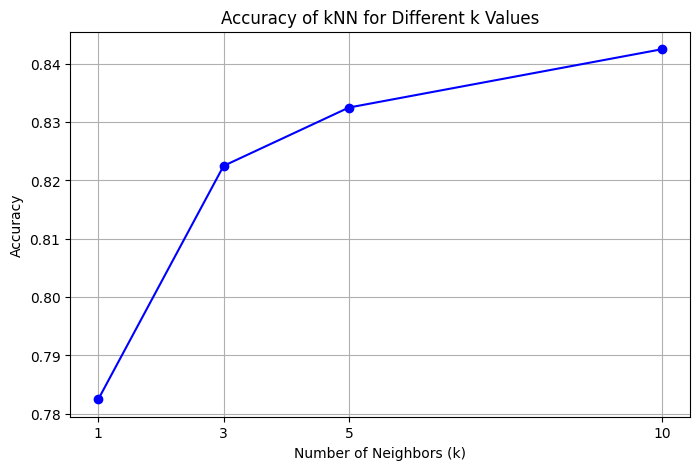

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Taking the k values
k_values = [1, 3, 5, 10]

# Dictionary to store results
results = {}
accuracies = []

# Loop through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    #### Scores to evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Approved')

    f1 = f1_score(y_test, y_pred, pos_label='Approved')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["Denied", "Approved"]).ravel()

# Compute Type 1 and Type 2 Error Rates
    type_1_error_rate = fn / 200  # Type 1 Error (False Negatives) divided by test size
    type_2_error_rate = fp / 200  # Type 2 Error (False Positives) divided by test size

# Displaying the error rates
    print(f"k-Nearest Neighbors (k={k}) Classifier Performance:")
    print(f"  Type 1 Error Rate: {type_1_error_rate:.4f}")
    print(f"  Type 2 Error Rate: {type_2_error_rate:.4f}\n")

    results[k] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

results_df = pd.DataFrame(results).T
print(results_df)
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### According to our Knn Model K=10 seems to have the least error for type 1 error but type 2 error is the most costly error since it takes denied applications as approved. Thus, k=3 makes the better assumption with type 2 error rate of 0.18.

## 4.Support Vector Machnine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
### For SVM I will use SVC from Scikit learn Library.
# Initialize the SVM with soft margin, assuming the model is linear
svm_model = SVC(C=1.0, kernel='linear')  # 'C' can be tuned; start with 1.0 as default

# Training the model
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluating the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["Denied", "Approved"]).ravel()

# Type 1 and Type 2 Error Rates
type_1_error_rate = fn / 200  # Type 1 Error
type_2_error_rate = fp / 200  # Type 2 Error

# Display the error rates
print("\nDecision Tree Classifier Performance using Entropy:")
print(f"  Type 1 Error Rate: {type_1_error_rate:.4f}")
print(f"  Type 2 Error Rate: {type_2_error_rate:.4f}")

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

#### Using SVC, the model has more accuracy than the other models with type 1 error 0.06 and type 2 error 0.18. Accuracy at 0.88

# Part 2: PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Applying PCA
# Here, n_components can be set based on the amount of variance you want to retain or a specific number of components
pca = PCA(n_components=2)  # For example, to reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Convert the transformed data into a DataFrame for easier interpretation
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# View the new features
print(X_pca_df.head())

# Optional: Plot the new features
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Feature Space')
plt.grid(True)
plt.show()




In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply PCA for different K values
K_values = [5, 10, 15]
results = {}

for K in K_values:
    # Apply PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Step 4: Train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)  # You can choose other k values here
    knn.fit(X_train_pca, y_train)
    y_pred_knn = knn.predict(X_test_pca)

    # Evaluate kNN performance
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    knn_report = classification_report(y_test, y_pred_knn, output_dict=True)

    # Step 5: Train SVM classifier
    svm_model = SVC(kernel='linear', C=1.0)
    svm_model.fit(X_train_pca, y_train)
    y_pred_svm = svm_model.predict(X_test_pca)

    # Evaluate SVM performance
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    svm_report = classification_report(y_test, y_pred_svm, output_dict=True)

    # Store results
    results[K] = {
        'kNN Accuracy': knn_accuracy,
        'kNN Report': knn_report,
        'SVM Accuracy': svm_accuracy,
        'SVM Report': svm_report
    }

# Step 6: Display results
for K in K_values:
    print(f"Results for K = {K}:")
    print(f"kNN Accuracy: {results[K]['kNN Accuracy']:.4f}")
    print(f"SVM Accuracy: {results[K]['SVM Accuracy']:.4f}")
    print("\n")

### 1. Standardizing and PCA analysis

### 2. SVC and kNN

In [ ]:
### Similar to the previous models I will use PCA from SciKit library to reduce the dimension and use SVC, kNN from Scikit as well.
K_values = [5, 10, 15]

### Dictionary to store the results
results = {}

for K in K_values:
    # Applying different n_component PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Defining the classifiers
    classifiers = {
        'kNN': KNeighborsClassifier(n_neighbors=5),
        'SVM': SVC(kernel='linear', C=1.0) }

    results[K] = {}

    for name, clf in classifiers.items():

        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_test_pca)

        # Calculating the Type 1 and Type 2 error rates using the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=["Denied", "Approved"]).ravel()

        # Type 1 and Type 2 Error Rates
        type_1_error_rate = fn / 200
        type_2_error_rate = fp / 200

        # Storing the results
        results[K][name] = {
            'Type 1 Error Rate': type_1_error_rate,
            'Type 2 Error Rate': type_2_error_rate
        }

# Displaying the results
for K in results:
    print(f"\nResults for PCA with K={K} components:")
    for clf_name in results[K]:
        print(f"  {clf_name} Classifier:")
        print(f"    Type 1 Error Rate: {results[K][clf_name]['Type 1 Error Rate']:.4f}")
        print(f"    Type 2 Error Rate: {results[K][clf_name]['Type 2 Error Rate']:.4f}")